In [9]:
import sunpy
import sunpy.map
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.coordinates import SkyCoord


In [2]:
map_level1 = sunpy.map.Map("../../src/HMI/20221024/lvl1_720s/hmi.M_720s.20221024_191200_TAI.3.magnetogram.fits")

In [7]:
def read_supersynthia_map(filename, wcs=map_level1.wcs, derotate=True):
    with fits.open(filename) as hdul:
        data = hdul[1].data.copy()
        map = sunpy.map.Map(data, wcs)
        if derotate:
            map = map.rotate()
        return map

In [8]:
azimuth_map = read_supersynthia_map("../../src/HMI/SuperSynthia/spDisambig_Field_Azimuth_Disamb/hmi.SuperSynthIA.20221024_191200_TAI.Field_Azimuth_Disamb.fits")

In [10]:
azimuth_submap = azimuth_map.submap(SkyCoord(-450*u.arcsec, 150*u.arcsec, frame=azimuth_map.coordinate_frame),
                                    top_right=SkyCoord(-350*u.arcsec, 300*u.arcsec, frame=azimuth_map.coordinate_frame))

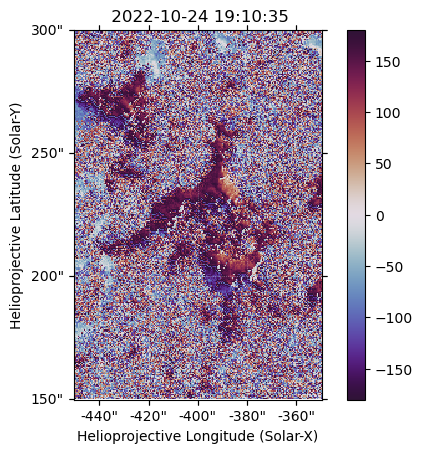

In [14]:
azimuth_submap.plot(cmap='twilight_shifted', interpolation='none')
plt.colorbar()

In [ ]:
azimuth_map_original = sunpy.map.Map("../../src/HMI/20221024/SHARP/cea/")